## Importing the data

In [1]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [2]:
import pandas as pd

In [3]:
for num,message in enumerate(messages[0:5]):
    print (num,message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




In [4]:
dframe = pd.read_csv('SMSSpamCollection',sep = '\t',header=None)

In [5]:
dframe.columns = ['State','Text']

In [6]:
dframe.head()

,State,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dframe.describe()

,State,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
dframe.groupby('State').describe()

Text
State                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

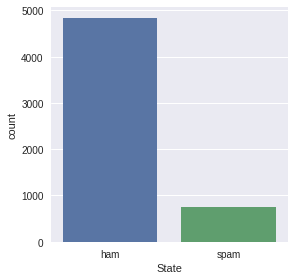

In [21]:
sns.factorplot(x='State',data = dframe,kind = 'count')

In [22]:
dframe['length'] = dframe['Text'].apply(len)

In [23]:
dframe.head()

,State,Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
dframe.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [28]:
(dframe[dframe['length']==910]['Text']).iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff59ac82e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff59aa5bac8>], dtype=object)

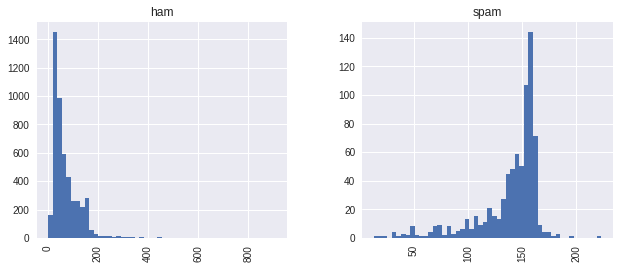

In [34]:
dframe.hist('length','State',bins = 50,figsize=(10,4))


In [35]:
dframe.head()

,State,Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Text processing

In [36]:
import string

In [37]:
message = "Hello man, how are you doing today??? I am feeling too Good"

In [38]:
no_punc = [char for char in message if char not in string.punctuation]

In [40]:
no_punc=''.join(no_punc)

In [48]:
message = no_punc

'Hello man how are you doing today I am feeling too Good'

In [42]:
from nltk.corpus import stopwords

In [45]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [54]:
no_punc.split(' ')

['Hello',
 'man',
 'how',
 'are',
 'you',
 'doing',
 'today',
 'I',
 'am',
 'feeling',
 'too',
 'Good']

In [58]:
clean_message = [word for word in no_punc.split(' ') if word not in stopwords.words('english')]

In [59]:
clean_message

['Hello', 'man', 'today', 'I', 'feeling', 'Good']

In [60]:
def text_process(mess):
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [62]:
#to test if the function is working
dframe['Text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Text, dtype: object

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bow = CountVectorizer(analyzer = text_process)

In [65]:
bow.fit(dframe['Text'])

CountVectorizer(analyzer=<function text_process at 0x7ff595573ae8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [67]:
len(bow.vocabulary_)

11425

In [76]:
message4 = (dframe['Text'][3])
print(message4)

U dun say so early hor... U c already then say...


In [74]:
print(bow.transform([dframe['Text'][3]]))

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [86]:
print(bow.get_feature_names()[10000])
print(bow.get_feature_names()[6204])

split
dun


In [93]:
messaages_bow = bow.transform(dframe['Text'])

In [94]:
from sklearn.feature_extraction.text import TfidfTransformer

In [95]:
tfidf_bow = TfidfTransformer()

In [96]:
tfidf_bow.fit(messaages_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [98]:
messages_tfidf = tfidf_bow.transform(messaages_bow)
#Assigns weights such that frequently occuring words are given less importance

## Training the model with and without splitting it

In [100]:
from sklearn.naive_bayes import MultinomialNB

In [102]:
model = MultinomialNB().fit(messages_tfidf,dframe['State'])

In [113]:
print('Predicted is ',model.predict(messages_tfidf)[4])
print('Expected is ',dframe['State'][4])

Predicted is  ham
Expected is  ham


In [115]:
predictions = model.predict(messages_tfidf)

In [116]:
from sklearn import metrics

In [119]:
print(metrics.accuracy_score(dframe['State'],predictions)*100,'%')

97.936109117 %


In [121]:
from sklearn.cross_validation import train_test_split

In [122]:
xtrain, xtest, ytrain, ytest = train_test_split(dframe['Text'],dframe['State'],test_size = 0.2)

In [124]:
print(xtrain.shape,xtest.shape)

(4457,) (1115,)


In [125]:
from sklearn.pipeline import Pipeline

In [126]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                      ('tfidf',TfidfTransformer()),
                      ('classifier',MultinomialNB())])

In [127]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7ff595573ae8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [129]:
predictions = pipeline.predict(xtest)

In [130]:
print(predictions)

['ham' 'ham' 'ham' ..., 'ham' 'spam' 'ham']


In [131]:
from sklearn.metrics import classification_report

In [132]:
print(classification_report(predictions,ytest))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1005
       spam       0.73      1.00      0.84       110

avg / total       0.97      0.96      0.97      1115



End of classification!Lost a lil accuracy after splitting the data but i guess that's okay :p